In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import matplotlib.pyplot as plt
from tqdm import tqdm

import time , os ,sys

In [2]:
# to view the tweet text 
pd.set_option('display.max_colwidth', None)

# table of contents :
   - [data gathering](#data-gathering)
   - [assising result](#assising-result)
   - [analysis](#analysis)
     

# data gathering

* read from `twitter-archive-enhanced.csv`
* download `image_predictions.tsv`

* use tweepy to load
    - retweet count
    - like count
    - ...
* save tweater data to `tweet_json.txt` and load them as df

#### read from `twitter-archive-enhanced.csv`

In [3]:
twitter_acrchive = pd.read_csv('twitter-archive-enhanced.csv')

#### download `image_predictions.tsv`

In [4]:
# download the file if not already downloades
if not os.path.exists('image_predictions.tsv'):
    response = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
    with open('image_predictions.tsv','wb') as file:
        file.write(response.content)    

In [5]:
image_predictions = pd.read_csv('image_predictions.tsv',sep='\t')

**use tweepy to load twtweets data**
    - retweet count
    - like count
    - ...


In [6]:
consumer_key = 'JJW6Y1yUkRzWORLJp3AsnoNS0'
consumer_secret = '7HOeyP0Q8f749qFE2E6hIACoFwgHYCv2nOIbLpblcIqJStZb7o'
access_token = '3084174784-vfOMmfQcZTFl3m5loSs5BQfYcfxHg3epEKcUAxH'
access_secret = '5tEPXKzPcxHBRaZzM0mzb7euKG2vZrE5uOkbO95BSoNfD'


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

## http://docs.tweepy.org/en/v3.2.0/api.html#API

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

- https://tweepy.readthedocs.io/en/latest/api.html#API.get_status
- http://docs.tweepy.org/en/latest/extended_tweets.html?highlight=tweet_mode#extended-mode
- http://docs.tweepy.org/en/latest/extended_tweets.html?highlight=tweet_mode#examples

In [7]:
failed_ids = []


if not os.path.exists('tweet_json.txt'):
    with open('tweet_json.txt','w') as tweets_file:
        for tweet_id in tqdm(twitter_acrchive.tweet_id):
            try:
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                json.dump(tweet._json, tweets_file)
                tweets_file.write('\n')
            except Exception as e:
                failed_ids.append(tweet_id)
    # summery 
    num_ids = len(twitter_acrchive.tweet_id)
    num_failed = len(failed_ids)
    num_success = num_ids - num_failed

    print('--------------------------\n')
    print('sucessfull = ' + str(num_success))
    print('failed = ' + str(num_failed))
    print('------ failed tweets ---------------------')
    print(failed_ids)
else:
    print('file already exist please remove it if not complate')

file already exist please remove it if not complate


* save tweater data to `tweet-json.txt` 
* convert data to dict then to df

In [8]:
rows = []
with open('tweet_json.txt','r') as json_file:
    for line in json_file.readlines():
        data = json.loads(line)
        data['favorite_count']
        
        rows.append({'tweet_id': data['id'],
                     'retweet_count':  data['retweet_count'],
                     'favorite_count': data['favorite_count']})

In [9]:
twitter_extra = pd.DataFrame(rows)

### save loaded data to csv

In [10]:
# save original data
image_predictions.to_csv('image_predictions.csv', index=False)
twitter_extra.to_csv('twitter_extra.csv', index=False)

# Assessing Data

### check any error in rating , dog stages

quate
```
I extracted this data programmatically, but I didn't do a very good job. The ratings probably aren't all correct. Same goes for the dog names and probably dog stages .
```




#### [assess_1](#assising-result)

In [11]:
calculated_score =  twitter_acrchive.rating_numerator.astype(str) + '/' + twitter_acrchive.rating_denominator.astype(str)

In [12]:
tweete_score = twitter_acrchive.text.str.extract(r'(\d+\/\d+)')[0]

In [13]:
twitter_acrchive.loc[calculated_score!=tweete_score,['tweet_id','text','rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
387,826598799820865537,"I was going to do 007/10, but the joke wasn't worth the &lt;10 rating",7,10


* `835246439529840640` has two rating like text

* `826598799820865537` is  comment , the rated was in other post

https://twitter.com/dog_rates/status/826598799820865537

#### [asses_2](#assising-result)

In [14]:
twitter_acrchive[['rating_numerator','rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [15]:
strange_numerator = twitter_acrchive[(twitter_acrchive.rating_numerator < 10) | (twitter_acrchive.rating_numerator > 20)]
strange_numerator[['tweet_id','text','rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
188,855862651834028034,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420,10
189,855860136149123072,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666,10
229,848212111729840128,"This is Jerry. He's doing a distinguished tongue slip. Slightly patronizing tbh. You think you're better than us, Jerry? 6/10 hold me back https://t.co/DkOBbwulw1",6,10
290,838150277551247360,@markhoppus 182/10,182,10
...,...,...,...,...
2351,666049248165822465,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,5,10
2352,666044226329800704,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,6,10
2353,666033412701032449,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,9,10
2354,666029285002620928,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,7,10


* rating with fraction doesn't get the whole number

#### [asses_3](#assising-result)

In [16]:
strange_denominator = twitter_acrchive[twitter_acrchive.rating_denominator != 10]
strange_denominator[['tweet_id','text','rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
342,832088576586297345,@docmisterio account started on 11/15/15,11,15
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
784,775096608509886464,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",9,11
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50


* `810984652412424192` has no rating 
* `666287406224695296`,`835246439529840640` ..  has two rating like text
* `758467244762497024` denomrator is not 10 

### check other column

#### [asses_4](#assising-result)


In [17]:
twitter_acrchive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


- complex values[url, string] in source coloumn 
- null values in [retweeted_status_id	retweeted_status_user_id	retweeted_status_timestamp]
, [in_reply_to_status_id	in_reply_to_user_id]

#### [asses_5](#assising-result)

In [18]:
twitter_acrchive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

- wrong dtypes: `[timestamp,retweeted_status_timestamp]`
- dog type in represented in multiple columns (doggo  floofer pupper puppo)
- column source is not descriptive


#### [asses_6](#assising-result)


In [19]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


- image prediction multible coulmns for beerd 
- number of tweats is higher than number of images
-------------------------------------

#### [asses_7](#assising-result)

In [20]:
image_predictions[~image_predictions.p1_dog & ~image_predictions.p2_dog & ~image_predictions.p3_dog]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2021,880935762899988482,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,1,street_sign,0.251801,False,umbrella,0.115123,False,traffic_light,0.069534,False
2022,881268444196462592,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,1,tusker,0.473303,False,Indian_elephant,0.245646,False,ibex,0.055661,False
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/887517108413886465/pu/img/WanJKwssZj4VJvL9.jpg,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False


* some images has no dogs

#### [asses_8](#assising-result)
* programitically extract score for multible image tweats is requires manual image inspection

#### [asses_9](#assising-result)

In [21]:
twitter_extra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


- tweet extra has related data to tweater_archive 

# assising result

[analysis](#analysis)

* note: asses anchor is written after the observation
## ROUND 1
### messy
- [x] tweet extra has related data to tweater_archive \[[assessing](#asses_9)\] \[[tide](#tide_1)\]
- [x] dog type in represented in column names (doggo  floofer pupper puppo)  \[[assessing](#asses_5)\] \[[tide](#tide_2)\]
- [x] name column `source`  is not descriptive \[[assessing](#asses_5)\] \[[tide](#tide_4)\]
- [x] image prediction multible coulmns for beard `hard analysis` \[[assessing](#asses_6)\] \[[tide](#tide_3)\]
- [x] dog breed can be added to Twitter archive  \[[tide](#tide_5)\]


### dirty
* tweater_archive
    - [x] complex values in source coloumn \[[assessing](#asses_4)\] \[[clean](#clean_1)\]
    - [x] rating with fraction takes fraction only _ex.. `9.5/10` is saved as `5/10`
    \[[assessing](#asses_2)\] \[[clean](#clean_2)\]
        - [x] `181` tweats that have retweet_status and `78` replays \[[clean](#clean_4)\]
    ```
    You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
    ```
    - [x] stages[doggo , floofer ..] and name columns use string `None` or `none` to represent null value [solved in tidy stage] 
    - [x] wrong dtypes  \[[assessing](#asses_5)\] \[[clean](#clean_6)\]
        * tweater_archive: timestamp, *after data tidtidying* [bread,type]

* image preditictions
    - [x] some images has no dogs \[[assessing](#asses_7)\] \[[clean](#clean_5)\]
    - [x] number of tweets is higher than number of predicted images \[[assessing](#asses_6)\] \[[clean](#clean_7)\]
    - [x] dog bread is catagorial dtype \[[clean](#clean_6)\]


# ROUND 2 _after cleaning
### dirty
- [x] some dogs has multipe dog_stage \[[assessing](#asses_2_1)\] \[[clean](#clean_8)\]
    

# cleanning

## make copy

In [22]:
twitter_acrchive_clean =  twitter_acrchive.copy()
twitter_extra_clean = twitter_extra.copy()
image_predictions_clean = image_predictions.copy()

## tidness issues

#### [tide_1](#assising-result)

### tweet extra has related data to twitter_archive 


solution:
* merge the two data frames with tweet_id

In [23]:
twitter_acrchive_clean = twitter_acrchive_clean.merge(twitter_extra, on='tweet_id')


## test

In [24]:
twitter_acrchive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'retweet_count', 'favorite_count'],
      dtype='object')

#### [tide_2](#assising-result)
### dog type is represented in column name (doggo  floofer pupper puppo)



solution:
- create column named `type` that holds this value 
- drop those columns 

In [25]:
# extract other columns names
id_list = list(twitter_acrchive_clean.columns)
dog_types = ['doggo','floofer','pupper','puppo']
id_list = [x for x in id_list if x not in dog_types]

# melt types columns
dog_type = twitter_acrchive_clean.melt(id_vars=id_list,value_name='dog_type')
dog_type = dog_type[['tweet_id','dog_type']]

In [26]:
# remove the records with None and add the new column 
dog_type = dog_type[dog_type.dog_type != 'None']
twitter_acrchive_clean = twitter_acrchive_clean.merge(dog_type,on='tweet_id',how='left')

In [27]:
twitter_acrchive_clean.drop(columns=dog_types, inplace=True)

# test

In [28]:
twitter_acrchive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2368 entries, 0 to 2367
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2368 non-null   int64  
 1   in_reply_to_status_id       79 non-null     float64
 2   in_reply_to_user_id         79 non-null     float64
 3   timestamp                   2368 non-null   object 
 4   source                      2368 non-null   object 
 5   text                        2368 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2309 non-null   object 
 10  rating_numerator            2368 non-null   int64  
 11  rating_denominator          2368 non-null   int64  
 12  name                        2368 non-null   object 
 13  retweet_count               2368 

#### asses_2_1
-------------------------------------
# dirty data
* the count increased from `2356` to `2368` 
    - some dogs has multipe types

#### [tide_3](#assising-result)

### image prediction represent  beard in multible coulmns

* take the most confidant dog bread
    1. change false in `p1,p2,p3` coulmns with null
    2. use `combine` to get columns with non null value betwean `p1,p2`
    3. reapeat 2 for `last_result,p3`
    4. drop useless coulmns

In [29]:
# replace false breed with null
image_predictions_clean.loc[~image_predictions_clean.p1_dog,['p1']] = np.nan
image_predictions_clean.loc[~image_predictions_clean.p1_dog,['p1_conf']] = np.nan


image_predictions_clean.loc[~image_predictions_clean.p2_dog,['p2']] = np.nan
image_predictions_clean.loc[~image_predictions_clean.p2_dog,['p2_conf']] = np.nan

image_predictions_clean.loc[~image_predictions_clean.p3_dog,['p3']] = np.nan
image_predictions_clean.loc[~image_predictions_clean.p3_dog,['p3_conf']] = np.nan

In [30]:
# choose non false breed p1,p2
image_predictions_clean['breed'] = image_predictions_clean.p1.combine_first(image_predictions_clean.p2)
image_predictions_clean['breed_confidance'] = image_predictions_clean.p1_conf.combine_first(image_predictions_clean.p2_conf)

In [31]:
# choose non false breed last_result,p3
image_predictions_clean['breed'] = image_predictions_clean.breed.combine_first(image_predictions_clean.p3)
image_predictions_clean['breed_confidance'] = image_predictions_clean.breed_confidance.combine_first(image_predictions_clean.p3_conf)

* naming was missy

In [32]:
image_predictions_clean.drop(columns=['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
                       inplace=True)

## test

In [33]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          2075 non-null   int64  
 1   jpg_url           2075 non-null   object 
 2   img_num           2075 non-null   int64  
 3   breed             1751 non-null   object 
 4   breed_confidance  1751 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 81.2+ KB


#### [tide_4](#assising-result)


## column source is not descriptive
- rename to `source_device`

In [34]:
twitter_acrchive_clean.rename(columns={'source':'source_device'}, inplace=True)

In [35]:
twitter_acrchive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2368 entries, 0 to 2367
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2368 non-null   int64  
 1   in_reply_to_status_id       79 non-null     float64
 2   in_reply_to_user_id         79 non-null     float64
 3   timestamp                   2368 non-null   object 
 4   source_device               2368 non-null   object 
 5   text                        2368 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2309 non-null   object 
 10  rating_numerator            2368 non-null   int64  
 11  rating_denominator          2368 non-null   int64  
 12  name                        2368 non-null   object 
 13  retweet_count               2368 

# ditry data


#### [clean_1](#assising-result)

###  complex values in source coloumn 
- select text in <h> tag body 
- convert to simpler values

In [36]:
tweete_source = twitter_acrchive_clean.source_device.str.extract(r'(>.*<)')[0]

In [37]:
twitter_acrchive_clean.source_device = tweete_source.str[1:-1]


In [38]:
map_simple_source = {
    'Twitter for iPhone' : 'iPhone',
    'Twitter Web Client' : 'Web Client',
    'Vine - Make a Scene' : 'Vine',
    'TweetDeck' : 'TweetDeck'
}
twitter_acrchive_clean.source_device.replace(map_simple_source, inplace=True)

## test 

In [39]:
twitter_acrchive_clean.source_device.value_counts()

iPhone        2232
Vine            92
Web Client      33
TweetDeck       11
Name: source_device, dtype: int64

### rating problems

#### [clean_2](#assising-result)

#### rating with fraction takes fraction only _ex.. `9.5/10` is saved as `5/10`_


### sol:
* use regex expration that take the point into acount

observed cases:
    - 9.5/10 
    - ...10/10 
    - 13/10

In [40]:
tweete_score = twitter_acrchive_clean.text.str.extract(r'(\d+\.?\d*\/\d+\.?\d*)')[0]

In [41]:
twitter_acrchive_clean[['rating_numerator','rating_denominator']] =  tweete_score.str.split('/',expand=True).astype(float)

## test

In [42]:
twitter_acrchive_clean.loc[twitter_acrchive_clean.rating_numerator%1!=0,
                           ['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
44,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10.0
341,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",9.75,10.0
700,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0
770,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10.0
1701,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.50,10.0
1724,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10.0


#### [clean_3](#assising-result)

#### tweets with rating like value 

## define

#### double rating cases
##### real doubles or 10/10 => take the first one only
- two dogs two ratings 
- one dog two 10/10

##### fake double => take last rating
- 24/7
- joking then rate
- contain date 4/20

## sol

#### sol [real double]:
- select tweats with `and` or `&` or `10/10`
- choose the first rate as the right rating



#### sol [fake double]:
- select tweats without `and` or `&` or `10/10`
- choose the last rate as the right rating



In [43]:
match_all = twitter_acrchive_clean.text.str.extractall(r'(\d+\.?\d*\/\d+\.?\d*)')
double_rated = twitter_acrchive_clean.iloc[match_all.xs(1,level=1).index]
double_rated = double_rated[['tweet_id','name','text','rating_numerator','rating_denominator']]

In [44]:
fake_double = double_rated[(double_rated.text.str.find('and') < 0) &
                            (double_rated.text.str.find('&') < 0) &
                            (double_rated.text.str.find('10/10') < 0)]

real_double = double_rated.drop(fake_double.index)

In [45]:
# take the second rate for fake doubles
second_valid = match_all.xs(1,level=1).loc[fake_double.index][0]
second_index = second_valid.index
second_nom_dem = second_valid.str.split('/',expand=True).astype(float)

twitter_acrchive_clean.loc[second_index,['rating_numerator']] = second_nom_dem[0]
twitter_acrchive_clean.loc[second_index,['rating_denominator']] = second_nom_dem[1]

# for real double first tweet is already taken

# test

In [46]:
#fake_doubles
twitter_acrchive_clean.loc[second_index,['tweet_id','text','rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
54,881633300179243008,@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,13.0,10.0
314,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",13.0,10.0
868,763167063695355904,RT @dog_rates: Meet Eve. She's a raging alcoholic 8/10 (would b 11/10 but pupper alcoholism is a tragic issue that I can't condone) https:/…,11.0,10.0
1177,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,13.0,10.0
1214,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,11.0,10.0
1471,695064344191721472,"This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P",13.0,10.0
1982,673295268553605120,Meet Eve. She's a raging alcoholic 8/10 (would b 11/10 but pupper alcoholism is a tragic issue that I can't condone) https://t.co/U36HYQIijg,11.0,10.0
2347,666287406224695296,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,9.0,10.0


In [47]:
#real_doubles
twitter_acrchive_clean.loc[real_double.index, ['tweet_id','name','text','rating_numerator','rating_denominator']]

,tweet_id,name,text,rating_numerator,rating_denominator
564,802624713319034886,None,"RT @dog_rates: ""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",12.0,10.0
773,777684233540206592,None,"""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",12.0,10.0
792,775096608509886464,None,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",9.0,11.0
1017,747600769478692864,Bookstore,This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ,10.0,10.0
1079,740373189193256964,None,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9.0,11.0
1234,714258258790387713,Travis,Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 &amp; 8/10\nget it together Flurp https://t.co/Akzl5ynMmE,10.0,10.0
1371,703356393781329922,Socks,This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10 https://t.co/8rc5I22bBf,9.0,10.0
1477,694352839993344000,Oliviér,Meet Oliviér. He takes killer selfies. Has a dog of his own. It leaps at random &amp; can't bark for shit. 10/10 &amp; 5/10 https://t.co/6NgsQJuSBJ,10.0,10.0
1520,691483041324204033,None,When bae says they can't go out but you see them with someone else that same night. 5/10 &amp; 10/10 for heartbroken pup https://t.co/aenk0KpoWM,5.0,10.0
1537,690400367696297985,Eriq,This is Eriq. His friend just reminded him of last year's super bowl. Not cool friend\n10/10 for Eriq\n6/10 for friend https://t.co/PlEXTofdpf,10.0,10.0


#### [clean_5](#assising-result)

### some images has no dogs 

remove tweeets with null value at dog breed (the AI model coudn't detect)

In [48]:
image_predictions_clean = image_predictions_clean[image_predictions_clean.breed.notna()]

# test

In [49]:
twitter_acrchive_clean.shape

(2368, 16)

#### [clean_4](#assising-result)

### `181` tweats that have retweet_status,  `78` replies

- remove retweats and replies
- remove there associated coulmns

In [50]:
retweet_index = twitter_acrchive_clean[twitter_acrchive_clean.retweeted_status_id.notnull()].index
twitter_acrchive_clean.drop(labels=retweet_index,inplace=True)

replay_index = twitter_acrchive_clean[twitter_acrchive_clean.in_reply_to_status_id.notnull()].index
twitter_acrchive_clean.drop(labels=replay_index,inplace=True)

In [51]:
twitter_acrchive_clean.drop(columns=['in_reply_to_status_id','in_reply_to_user_id'],inplace=True)
twitter_acrchive_clean.drop(columns=['retweeted_status_id',
                                     'retweeted_status_user_id',
                                     'retweeted_status_timestamp'],inplace=True)

## test

In [52]:
twitter_acrchive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2108 entries, 0 to 2367
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2108 non-null   int64  
 1   timestamp           2108 non-null   object 
 2   source_device       2108 non-null   object 
 3   text                2108 non-null   object 
 4   expanded_urls       2105 non-null   object 
 5   rating_numerator    2108 non-null   float64
 6   rating_denominator  2108 non-null   float64
 7   name                2108 non-null   object 
 8   retweet_count       2108 non-null   int64  
 9   favorite_count      2108 non-null   int64  
 10  dog_type            347 non-null    object 
dtypes: float64(2), int64(3), object(6)
memory usage: 197.6+ KB


# test

#### [clean_6](#assising-result)

## wrong dtypes
    * timedate: timestamp
    * catagorial : dog_type ,source_device

In [53]:
twitter_acrchive_clean.timestamp = pd.to_datetime(twitter_acrchive_clean.timestamp)
twitter_acrchive_clean.dog_type = twitter_acrchive_clean.dog_type.astype('category')
twitter_acrchive_clean.source_device = twitter_acrchive_clean.source_device.astype('category')
image_predictions_clean.breed = image_predictions_clean.breed.astype('category')

## test

In [54]:
twitter_acrchive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2108 entries, 0 to 2367
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2108 non-null   int64              
 1   timestamp           2108 non-null   datetime64[ns, UTC]
 2   source_device       2108 non-null   category           
 3   text                2108 non-null   object             
 4   expanded_urls       2105 non-null   object             
 5   rating_numerator    2108 non-null   float64            
 6   rating_denominator  2108 non-null   float64            
 7   name                2108 non-null   object             
 8   retweet_count       2108 non-null   int64              
 9   favorite_count      2108 non-null   int64              
 10  dog_type            347 non-null    category           
dtypes: category(2), datetime64[ns, UTC](1), float64(2), int64(3), object(3)
memory usage: 169.2+ KB

#### [clean_7](#assising-result)

### number of tweets is higher than number of predicted images

define : there are tweets that has no images or images without dogs we nee to exclude those from analysis

sol : 
- remove tweets whose id doesn't exist in image prediction data frame

In [55]:
twitter_acrchive_clean = twitter_acrchive_clean[twitter_acrchive_clean.tweet_id.isin(image_predictions_clean.tweet_id)]
image_predictions_clean = image_predictions_clean[image_predictions_clean.tweet_id.isin(twitter_acrchive_clean.tweet_id)]

# test

In [56]:
print(image_predictions_clean.shape)
print(twitter_acrchive_clean.shape)
# the difrance in size is result from duplicate in twitter_acrchive_clean

(1666, 5)
(1675, 11)


#### [clean_8](#assising-result)

### some dogs has multipe dog_stages

define : in tweet text we rate dogs may mention two dog stages which result in duplcate in data

sol : 
- remove duplicate tweets 


In [57]:
twitter_acrchive_clean.drop_duplicates(subset=['tweet_id'],inplace=True)

# test

In [58]:
# check if duplicate make them equal
print(image_predictions_clean.shape)
print(twitter_acrchive_clean.shape)

twitter_acrchive_clean.tweet_id.duplicated().sum()

(1666, 5)
(1666, 11)


0

# save data

In [59]:
twitter_archive_master = twitter_acrchive_clean.merge(image_predictions_clean,on='tweet_id')

In [60]:
twitter_archive_master['rating_ratio'] = twitter_archive_master.rating_numerator / twitter_archive_master.rating_denominator

In [61]:
twitter_archive_master.to_csv('twitter_archive_master.csv',index=False)
twitter_acrchive_clean.to_csv('twitter_acrchive_clean.csv',index=False)
image_predictions_clean.to_csv('image_predictions_clean.csv',index=False)

# analysis
- avrage rating for dog stages, dogbreed
- most retweated/loved type
- is rating random ? 
- value count for types
- do people agree ? the likes compared to rating
- number of photos effect

In [62]:
# master analysis 

In [63]:
means_by_stage = twitter_archive_master.groupby('dog_type').mean()
means_by_stage = means_by_stage[['rating_ratio','retweet_count','favorite_count']]

In [64]:
means_by_stage.sort_values('favorite_count')

,rating_ratio,retweet_count,favorite_count
dog_type,,,
pupper,1.088717,2440.469880,7584.584337
floofer,1.200000,4968.714286,13206.000000
doggo,1.184127,6928.238095,19204.222222
puppo,1.195238,6375.761905,21457.809524


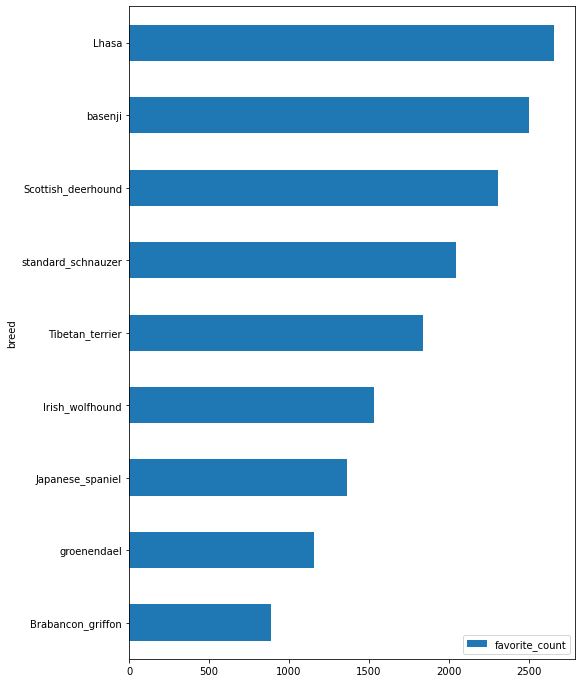

In [65]:
means_by_breed = twitter_archive_master.groupby('breed').mean()
means_by_breed = means_by_breed[['favorite_count']]

means_by_breed = means_by_breed.sort_values('favorite_count')
top_breeds = means_by_breed.iloc[:9]
top_breeds.plot.barh(figsize=(8, 12));

* seems scwed a bit the right but overall seems a normal distubtion not random values

## value count for types

In [66]:
common_dogs = twitter_archive_master.dog_type.value_counts()

In [67]:
round((common_dogs/common_dogs.sum() )*100)

pupper     65.0
doggo      25.0
puppo       8.0
floofer     3.0
Name: dog_type, dtype: float64

In [68]:
twitter_archive_master_time = twitter_archive_master.set_index('timestamp')

In [69]:
month_groub = twitter_archive_master_time.resample('1M')
month_groub_mean = month_groub.mean()
month_groub_count = month_groub.count()

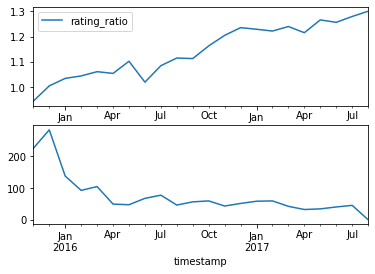

In [70]:
fig = plt.figure()

ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)


month_groub_mean[['rating_ratio']].plot(ax=ax1);
month_groub_count.tweet_id.plot(ax=ax2,);

In [71]:
month_groub_count.tweet_id

timestamp
2015-11-30 00:00:00+00:00    225
2015-12-31 00:00:00+00:00    283
2016-01-31 00:00:00+00:00    138
2016-02-29 00:00:00+00:00     93
2016-03-31 00:00:00+00:00    105
2016-04-30 00:00:00+00:00     50
2016-05-31 00:00:00+00:00     48
2016-06-30 00:00:00+00:00     68
2016-07-31 00:00:00+00:00     78
2016-08-31 00:00:00+00:00     47
2016-09-30 00:00:00+00:00     57
2016-10-31 00:00:00+00:00     60
2016-11-30 00:00:00+00:00     44
2016-12-31 00:00:00+00:00     52
2017-01-31 00:00:00+00:00     59
2017-02-28 00:00:00+00:00     60
2017-03-31 00:00:00+00:00     43
2017-04-30 00:00:00+00:00     33
2017-05-31 00:00:00+00:00     35
2017-06-30 00:00:00+00:00     41
2017-07-31 00:00:00+00:00     46
2017-08-31 00:00:00+00:00      1
Freq: M, Name: tweet_id, dtype: int64